In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../src/')
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pathlib import Path

from preprocessing import BagOfNotes, MidiPathToDataFrame

In [3]:
data_dir = Path('../maestro/maestro-v3.0.0/')

In [4]:
pipeline = Pipeline([
    ('loader', MidiPathToDataFrame(data_dir)),
    ('BoN', BagOfNotes(normalize=False)),
    ('pca', PCA(2)),
])
df = pd.read_csv(data_dir / 'maestro-v3.0.0.csv')
sample = df.sample(100)

In [5]:
transformed = pipeline.fit_transform(sample.midi_filename)

In [6]:
def get_color(composer):
    if composer == 'Franz Schubert':
        return 'r'
    if composer == 'Frédéric Chopin':
        return 'g'
    if composer == 'Franz Liszt':
        return 'b'
    if composer == 'Johann Sebastian Bach':
        return 'c'
    if composer == 'Ludwig van Beethoven':
        return 'm'
    return 'k'
sample.canonical_composer.value_counts()

canonical_composer
Franz Schubert                              24
Frédéric Chopin                             18
Franz Liszt                                 12
Ludwig van Beethoven                         8
Johann Sebastian Bach                        7
Robert Schumann                              5
Sergei Rachmaninoff                          4
Alexander Scriabin                           3
Joseph Haydn                                 3
Domenico Scarlatti                           3
Claude Debussy                               3
Mily Balakirev                               2
Johann Sebastian Bach / Myra Hess            1
Johann Sebastian Bach / Ferruccio Busoni     1
Isaac Albéniz                                1
Johannes Brahms                              1
Georges Bizet / Ferruccio Busoni             1
Carl Maria von Weber                         1
Muzio Clementi                               1
Nikolai Medtner                              1
Name: count, dtype: int64

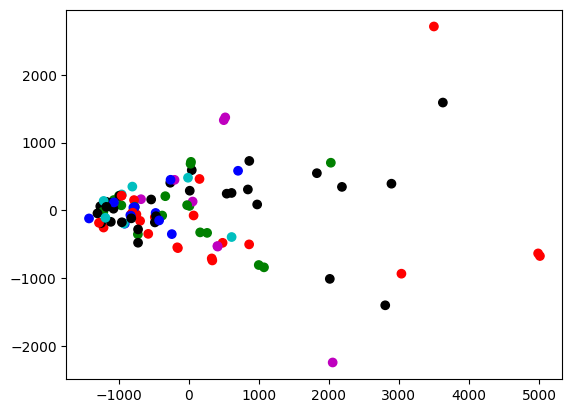

In [7]:
plt.scatter(transformed[:, 0], transformed[:, 1], c=[get_color(comp) for comp in sample.canonical_composer])
plt.show()